# Cositas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import importlib
from functools import partial
import pandas as pd

In [2]:
class Binder:
    def __init__(self, module_name, function_name, params):

        self.module_name = module_name
        self.function_name = function_name
        self.params = params
        self.module = None
        self.prepared_function = None

    def import_module(self):
        """Imports the module and assigns it to self.module."""
        self.module = importlib.import_module(self.module_name)
        #print(f"Module {self.module_name} imported successfully.")

    def fixer(self):
        """Fixes parameters to the function and returns a partially applied function."""
        if self.module is None:
            print("You have to import_module first :)")
            return None

        func = getattr(self.module, self.function_name, None)
        if func is None:
            print(f"Function {self.function_name} not found in module {self.module_name}.")
            return None

        self.prepared_function = partial(func, *self.params)
        return self.prepared_function

In [3]:
def plot_3_ts(system, sol):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    jejes = ['x', 'y', 'z']
    colors = ['red', 'green', 'blue']

    for i, j in enumerate(jejes):
        axs[i].plot(sol.t, sol.y[i], color=colors[i])
        axs[i].set_ylabel(j)
        axs[i].set_title(f'{system} System: {j} vs Time (RK45)')

    plt.tight_layout()
    plt.show()

In [4]:
def from_sol_to_df(sol,sol_dim,freq):
  if sol_dim == 2:
    df = pd.DataFrame({'x':sol.y[0],'y':sol.y[1] })
    df = df.copy()
    df['date'] = pd.date_range(start='1970-01-01', periods=len(df), freq=freq)
    df = df.set_index('date')
    df = df.asfreq(freq)
    # Rename the 'Demand' column to 'y' in the DataFrame
    df = df.rename(columns = {'y': 'exo_1'})
    df = df.rename(columns = {'x': 'y'})
    df_transitioned = df
    return df_transitioned
  elif sol_dim == 3:
    df = pd.DataFrame({'x':sol.y[0],'y':sol.y[1],'z':sol.y[2] })
    df = df.copy()
    df['date'] = pd.date_range(start='1970-01-01', periods=len(df), freq=freq)
    df = df.set_index('date')
    df = df.asfreq(freq)
    # Rename the 'Demand' column to 'y' in the DataFrame
    df = df.rename(columns = {'y': 'exo_1', 'z' : 'exo_2'})
    df = df.rename(columns = {'x': 'y'})
    df_transitioned = df
    return df_transitioned

In [5]:
def plot_3d(sol):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(sol.y[0], sol.y[1], sol.y[2],
          color='purple', lw=0.5)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title(f'Attractor (3D)')  # {self.f.func.__name__}
  ax.view_init(elev=30, azim=60)

In [6]:
def tesefresco(df):
  df_prep = df.copy().reset_index()
  df_prep_new = df_prep[["date", "y"]]
  df_prep_new['date'] = 1
  return df_prep_new

In [7]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

In [8]:
# impoall_df sklearn.manifold import TSNE
# from sklearn.preprocessing import LabelEncoder
# import umap.umap_ as umap


# def higher_visualization(df, cmap):
#     # Separate labels and features
#     y_raw = df.iloc[:, 0].values  # labels (first column)
#     X = df.iloc[:, 1:].values     # features (rest columns)

#     # Convert string labels to integers
#     le = LabelEncoder()
#     y = le.fit_transform(y_raw)

#     # Prepare figure with 1 row and 3 subplots
#     fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#     # PCA
#     X_pca = PCA(n_components=2).fit_transform(X)
#     axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
#     axs[0].set_title("PCA")

#     # t-SNE
#     X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
#     axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap)
#     axs[1].set_title("t-SNE")

#     # UMAP
#     X_umap = umap.UMAP(random_state=0).fit_transform(X)
#     axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=cmap)
#     axs[2].set_title("UMAP")

#     plt.tight_layout()
#     plt.show()


In [9]:
# pip install nolds

# Generacion de Series de Tiempo de Rossler

In [10]:
rossler = """
def rossler(a,b,c, t,state):
    x, y, z = state
    dx = - y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return [dx,dy,dz]
"""

In [11]:
with open("rossler.py", "w") as f:
    f.write(rossler.strip())

In [12]:
# Parameters
a = 0.2
b = 0.2
c = 5.7
params = (a,b,c)

# Use Binder to fix parameters
binder = Binder("rossler", "rossler", params)
binder.import_module()
rossler_fixed = binder.fixer()  # Partially applied function

In [13]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [14]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [15]:
rossler_sample_0 = from_sol_to_df(sol_0_rossler,3,'D')

In [16]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [17]:
rossler_sample_1= from_sol_to_df(sol_1_rossler,3,'D')

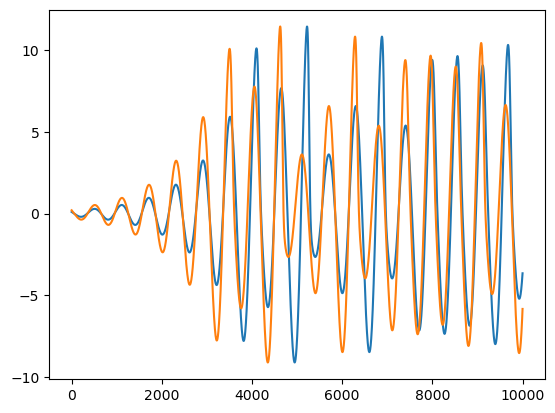

In [18]:
plt.plot(sol_0_rossler.y[0])
plt.plot(sol_1_rossler.y[0])

In [19]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [20]:
rossler_sample_2= from_sol_to_df(sol_2_rossler,3,'D')

In [21]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_rossler = solve_ivp(rossler_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [22]:
rossler_sample_3= from_sol_to_df(sol_3_rossler,3,'D')

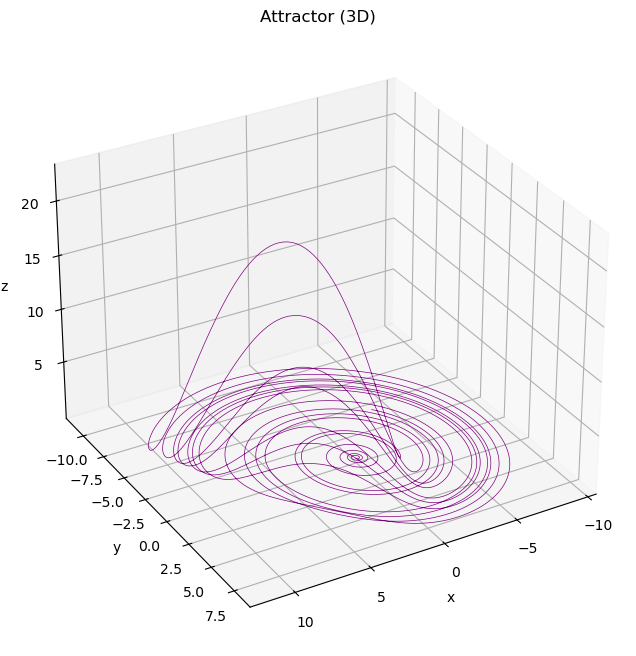

In [23]:
plot_3d(sol_0_rossler)

In [25]:
sol_0_rossler

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.050e-02 ...  1.050e+02  1.050e+02]
        y: [[ 1.000e-01  9.791e-02 ... -3.693e+00 -3.652e+00]
            [ 1.000e-01  1.013e-01 ... -3.906e+00 -3.952e+00]
            [ 1.000e-01  9.633e-02 ...  2.055e-02  2.062e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2384
     njev: 0
      nlu: 0

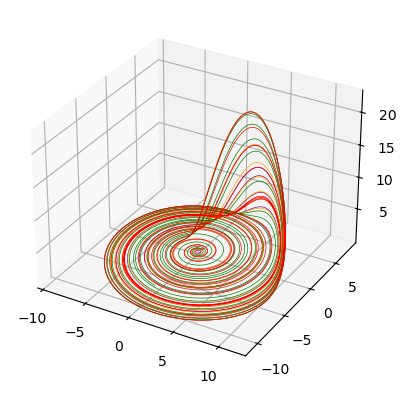

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_rossler.y[0], sol_0_rossler.y[1], sol_0_rossler.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_rossler.y[0], sol_1_rossler.y[1], sol_1_rossler.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_rossler.y[0], sol_2_rossler.y[1], sol_2_rossler.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_rossler.y[0], sol_3_rossler.y[1], sol_3_rossler.y[2], color='red', lw=0.5)

plt.show()

# Generacion de Series de Tiempo de Lorenz63

In [233]:
lorenz63 = """
def lorenz63(sigma, beta, rho, t, state):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x *  y - beta *z
    return [dx,dy,dz]
"""

In [234]:
with open("lorenz63.py", "w") as f:
    f.write(lorenz63.strip())

In [235]:
# Parameters
sigma = 10
beta = 8/3
rho = 25.5
params = (sigma,beta,rho)

# Use Binder to fix parameters
binder = Binder("lorenz63", "lorenz63", params)
binder.import_module()
lorenz63_fixed = binder.fixer()  # Partially applied function

In [236]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [237]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [238]:
lorenz63_sample_0 = from_sol_to_df(sol_0_lorenz63,3,'D')

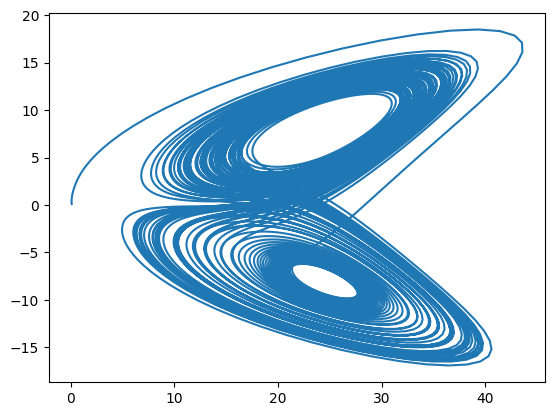

In [239]:
plt.plot(sol_0_lorenz63.y[2], sol_0_lorenz63.y[0])

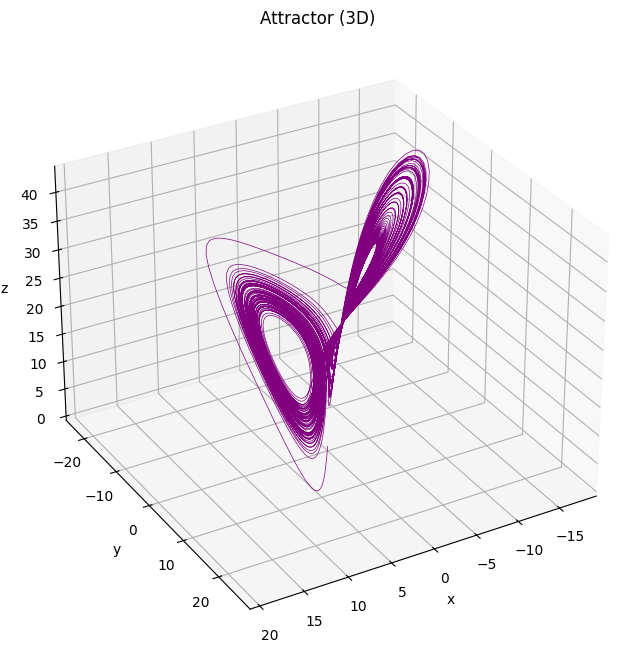

In [240]:
plot_3d(sol_0_lorenz63)

In [241]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [242]:
lorenz63_sample_1 = from_sol_to_df(sol_1_lorenz63,3,'D')

In [243]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [244]:
lorenz63_sample_2 = from_sol_to_df(sol_2_lorenz63,3,'D')

In [245]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_lorenz63 = solve_ivp(lorenz63_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [246]:
lorenz63_sample_3 = from_sol_to_df(sol_3_lorenz63,3,'D')

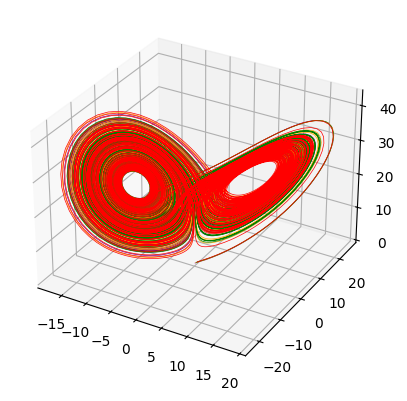

In [247]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_lorenz63.y[0], sol_0_lorenz63.y[1], sol_0_lorenz63.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_lorenz63.y[0], sol_1_lorenz63.y[1], sol_1_lorenz63.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_lorenz63.y[0], sol_2_lorenz63.y[1], sol_2_lorenz63.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_lorenz63.y[0], sol_3_lorenz63.y[1], sol_3_lorenz63.y[2], color='red', lw=0.5)

plt.show()

# Generacion de Series de Tiempo de Aizawa

In [248]:
aizawa = '''
def aizawa(a, b, c, d, e, f, t,state):
    x, y, z = state
    dx = (z - b) * x - d * y
    dy = d * x + (z - b) * y
    dz = c + a * z - (z**3)/3 - (x ** 2 + y ** 2) * (1 + e *z) + f * z * x **3
    return [dx,dy,dz]
'''

In [249]:
with open("aizawa.py", "w") as f:
    f.write(aizawa.strip())

In [250]:
# Parameters
a = 0.95
b = 0.7
c = 0.65
d = 3.5
e = 0.25
f = 0.1
params = (a,b, c, d, e, f)

# Use Binder to fix parameters
binder = Binder("aizawa", "aizawa", params)
binder.import_module()
aizawa_fixed = binder.fixer()  # Partially applied function

In [251]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [252]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [253]:
aizawa_sample_0 = from_sol_to_df(sol_0_aizawa,3,'D')

In [254]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [255]:
aizawa_sample_1 = from_sol_to_df(sol_1_aizawa,3,'D')

In [256]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [257]:
aizawa_sample_2 = from_sol_to_df(sol_2_aizawa,3,'D')

In [258]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_aizawa = solve_ivp(aizawa_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [259]:
aizawa_sample_3 = from_sol_to_df(sol_3_aizawa,3,'D')

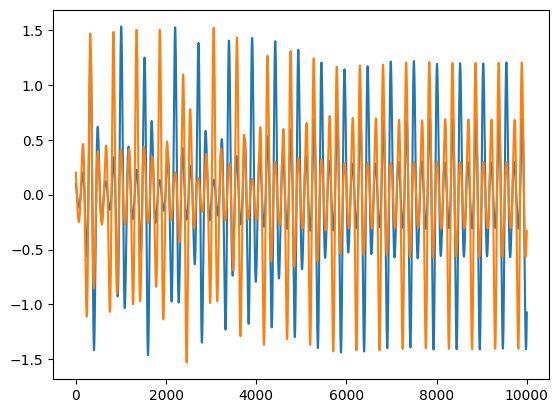

In [260]:
plt.plot(sol_0_aizawa.y[0])
plt.plot(sol_1_aizawa.y[0])
#plt.xlim(2000,5000)

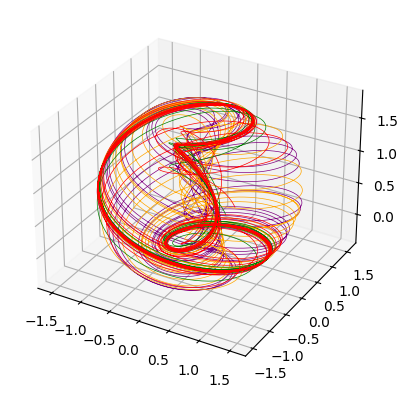

In [261]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_aizawa.y[0], sol_0_aizawa.y[1], sol_0_aizawa.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_aizawa.y[0], sol_1_aizawa.y[1], sol_1_aizawa.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_aizawa.y[0], sol_2_aizawa.y[1], sol_2_aizawa.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_aizawa.y[0], sol_3_aizawa.y[1], sol_3_aizawa.y[2], color='red', lw=0.5)

plt.show()


# Generacion de Series de Tiempo de Sprott

In [262]:
sprott = '''
def sprott(a, b, t,state):
    x, y, z = state
    dx = y + a * x * y + x * z
    dy = 1 - b * x **2 + y * z
    dz = x - x ** 2 - y ** 2
    return [dx,dy,dz]
'''

In [263]:
with open("sprott.py", "w") as f:
    f.write(sprott.strip())

In [264]:
# Parameters
a = 2.07
b = 1.79
params = (a,b)

# Use Binder to fix parameters
binder = Binder("sprott", "sprott", params)
binder.import_module()
sprott_fixed = binder.fixer()  # Partially applied function

In [265]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [266]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [267]:
sprott_sample_0 = from_sol_to_df(sol_0_sprott,3,'D')

In [268]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [269]:
sprott_sample_1 = from_sol_to_df(sol_1_sprott,3,'D')

In [270]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [271]:
sprott_sample_2 = from_sol_to_df(sol_2_sprott,3,'D')

In [272]:
y0 = [0.4, 0.4,0.4]
# Solve the system
sol_3_sprott = solve_ivp(sprott_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [273]:
sprott_sample_3 = from_sol_to_df(sol_3_sprott,3,'D')

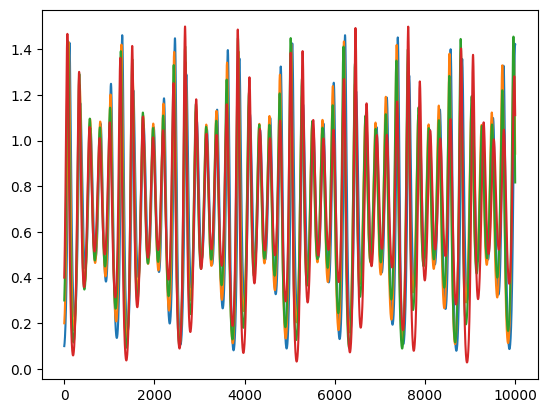

In [274]:
plt.plot(sol_0_sprott.y[0])
plt.plot(sol_1_sprott.y[0])
plt.plot(sol_2_sprott.y[0])
plt.plot(sol_3_sprott.y[0])
#plt.xlim(2000,5000)

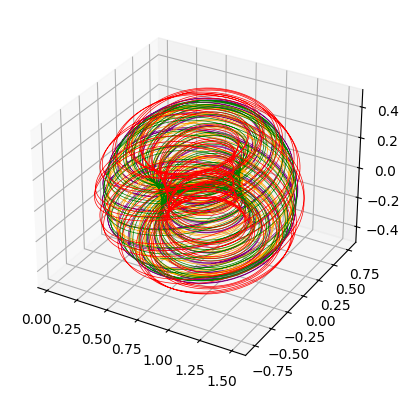

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_sprott.y[0], sol_0_sprott.y[1], sol_0_sprott.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_sprott.y[0], sol_1_sprott.y[1], sol_1_sprott.y[2], color='orange', lw=0.5)

# Third trajectory
ax.plot(sol_2_sprott.y[0], sol_2_sprott.y[1], sol_2_sprott.y[2], color='green', lw=0.5)

# Fouth trajectory
ax.plot(sol_3_sprott.y[0], sol_3_sprott.y[1], sol_3_sprott.y[2], color='red', lw=0.5)

plt.show()


# Generacion de Series de Tiempo de Dadras

In [276]:
dadras = '''
def dadras(a, b, c, d, e, t,state):
    x, y, z = state
    dx = y - a * x  + b * y * z
    dy = c * y - x * z + z
    dz = d * x * y - e * z
    return [dx,dy,dz]
'''

In [277]:
with open("dadras.py", "w") as f:
    f.write(dadras.strip())

In [278]:
# Parameters
a = 3
b = 2.7
c = 1.7
d = 2
e = 9
params = (a,b,c,d,e)

# Use Binder to fix parameters
binder = Binder("dadras", "dadras", params)
binder.import_module()
dadras_fixed = binder.fixer()  # Partially applied function

In [279]:
t_span = (0, 105)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

In [280]:
y0 = [0.1, 0.1, 0.1]
# Solve the system
sol_0_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [281]:
dadras_sample_0 = from_sol_to_df(sol_0_dadras,3,'D')

In [282]:
y0 = [0.2, 0.2, 0.2]
# Solve the system
sol_1_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [283]:
dadras_sample_1 = from_sol_to_df(sol_1_dadras,3,'D')

In [284]:
y0 = [0.3, 0.3, 0.3]
# Solve the system
sol_2_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [285]:
dadras_sample_2 = from_sol_to_df(sol_2_dadras,3,'D')

In [286]:
y0 = [0.4, 0.4, 0.4]
# Solve the system
sol_3_dadras = solve_ivp(dadras_fixed, t_span, y0, method='RK45', t_eval=t_eval)

In [287]:
dadras_sample_3 = from_sol_to_df(sol_3_dadras,3,'D')

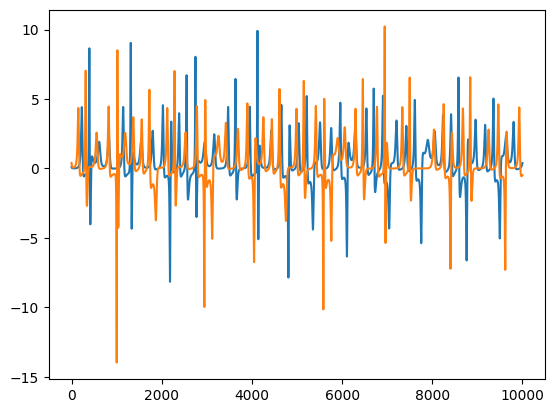

In [288]:
plt.plot(sol_0_dadras.y[2])
plt.plot(sol_3_dadras.y[2])
#plt.xlim(2000,5000)

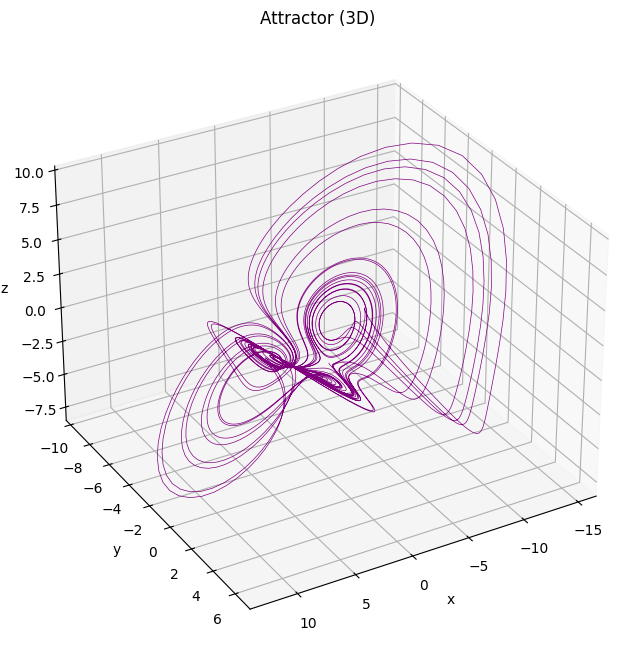

In [289]:
plot_3d(sol_0_dadras)

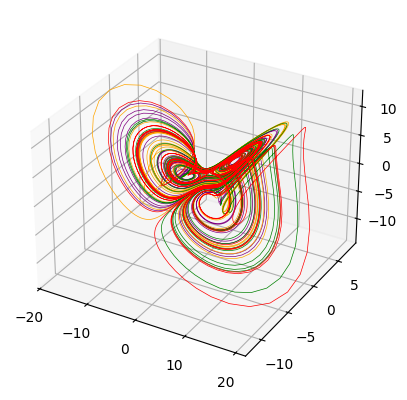

In [290]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(sol_0_dadras.y[0], sol_0_dadras.y[1], sol_0_dadras.y[2], color='purple', lw=0.5)

# Second trajectory
ax.plot(sol_1_dadras.y[0], sol_1_dadras.y[1], sol_1_dadras.y[2], color='orange', lw=0.5)

# First trajectory
ax.plot(sol_2_dadras.y[0], sol_2_dadras.y[1], sol_2_dadras.y[2], color='green', lw=0.5)

# Second trajectory
ax.plot(sol_3_dadras.y[0], sol_3_dadras.y[1], sol_3_dadras.y[2], color='red', lw=0.5)

plt.show()

# Caothic Measures Calculations 

In [ ]:
import nolds

In [ ]:
lyap = nolds.lyap_r(rossler_sample_1['y'])
print("Lyapunov Exponent:", lyap)
corr_dim = nolds.corr_dim(rossler_sample_1['y'], emb_dim=10)
print("Correlation Dimension:", corr_dim)
ap_entropy = nolds.sampen(rossler_sample_1['y'])
print("Approximate Kolmogorov Entropy:", ap_entropy)

Lyapunov Exponent: 0.0007819137928074259


In [ ]:
dataframes = [rossler_sample_0, rossler_sample_1, rossler_sample_2, rossler_sample_3,
              lorenz63_sample_0, lorenz63_sample_1, lorenz63_sample_2, lorenz63_sample_3,
              aizawa_sample_0, aizawa_sample_1, aizawa_sample_2, aizawa_sample_3,
              dadras_sample_0, dadras_sample_1, dadras_sample_2, dadras_sample_3,
              sprott_sample_0, sprott_sample_1, sprott_sample_2, sprott_sample_3]


# Corresponding system labels
labels = ['rossler'] * 4 + ['lorenz63'] * 4 + ['aizawa'] * 4 + ['dadras'] * 4 + ['sprott'] * 4

# Feature extraction function (uses your actual functions)
def extract_chaos_features(df):
    y = df['y'].values
    return {
        'lyap': nolds.lyap_r(y),
        'corr_dim': nolds.corr_dim(y, emb_dim=10),
        'ap_entropy': nolds.sampen(y),
    }

# Generate feature dictionary for each sample
feature_dicts = []

for df, label in zip(dataframes, labels):
    features = extract_chaos_features(df)
    features['system'] = label
    feature_dicts.append(features)

# Create final DataFrame
features_df = pd.DataFrame(feature_dicts)

features_df.head

In [304]:
features_df.to_csv("chaos_features.csv", index=False)

In [112]:
chaos_features = pd.read_csv("/home/think/Desktop/TESIS/csv_files/chaos_features.csv")

In [114]:
# Reorder columns to put 'sample_name' first
cols = ['system'] + [col for col in chaos_features.columns if col != 'system']
chaos_features = chaos_features[cols]

In [115]:
chaos_features.head()

,system,lyap,corr_dim,ap_entropy
0,rossler,0.000906,1.303454,0.026955
1,rossler,0.000650,1.421300,0.030519
2,rossler,0.001003,1.465523,0.032465
3,rossler,0.000947,1.480771,0.033371
4,lorenz63,0.008874,1.581581,0.144200


In [117]:
from sklearn.preprocessing import MinMaxScaler

# X is your DF of shape (20, ~788)
X = chaos_features.iloc[:, 1:].copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

In [119]:
X_mm.head()

,lyap,corr_dim,ap_entropy
0,0.023053,0.290207,0.000000
1,0.011685,0.506800,0.027567
2,0.027359,0.588078,0.042622
3,0.024844,0.616103,0.049628
4,0.377007,0.801384,0.906887


In [120]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_mm['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_mm.columns if col != 'sample_name']
X_mm = X_mm[cols]

In [121]:
X_mm.head()

,sample_name,lyap,corr_dim,ap_entropy
0,rossler,0.023053,0.290207,0.000000
1,rossler,0.011685,0.506800,0.027567
2,rossler,0.027359,0.588078,0.042622
3,rossler,0.024844,0.616103,0.049628
4,lorenz63,0.377007,0.801384,0.906887


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


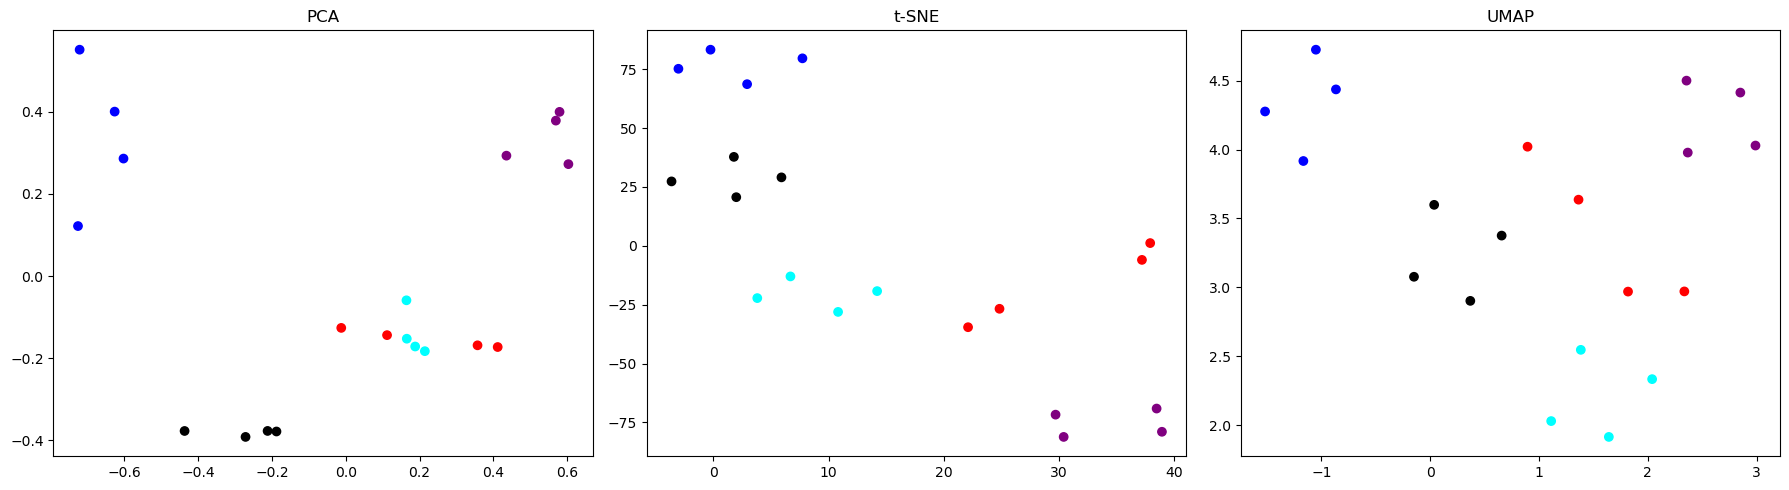

In [122]:
higher_visualization(X_mm, cmap = my_cmap)

# Construyendo nuestro df

En este caso nos vamos a concentrar en la serie x, el analisis se puede extender usando las 3 series de cada sistema pero no lo haremos todavia.

In [ ]:
pip install tsfresh

In [ ]:
from tsfresh import extract_features

def extracto(df):
    df_prep = tesefresco(df)  # your preprocessing function
    weee = extract_features(df_prep, column_id='date')
    return weee

# Suppose you have a list of your 20 dataframes
dataframes = [rossler_sample_0, rossler_sample_1, rossler_sample_2, rossler_sample_3,
              lorenz63_sample_0, lorenz63_sample_1, lorenz63_sample_2, lorenz63_sample_3,
              aizawa_sample_0, aizawa_sample_1, aizawa_sample_2, aizawa_sample_3,
              dadras_sample_0, dadras_sample_1, dadras_sample_2, dadras_sample_3,
              sprott_sample_0, sprott_sample_1, sprott_sample_2, sprott_sample_3]

# Apply extracto to each dataframe
features_list = [extracto(df) for df in dataframes]

# Concatenate all extracted features into a single dataframe
import pandas as pd

all_features = pd.concat(features_list, axis=0)

<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_new['date'] = 1
Feature Extraction: 100%|██████████| 1/1 [02:11<00:00, 131.41s/it]
<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep_new['date'] = 1
Feature Extraction: 100%|██████████| 1/1 [02:07<00:00, 127.89s/it]
<ipython-input-7-1775987638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
# Save to CSV
all_features.to_csv("all_features.csv", index=False)

# Data Treatment

In [28]:
import pandas as pd
all_features = pd.read_csv("/home/think/Desktop/TESIS/csv_files/all_features.csv")

In [29]:
all_features.head()

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,-0.000375,0.000002,-0.096896,...,0.045395,0.125256,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,NaN,11.424825
1,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,-0.000603,0.000004,-0.166466,...,0.045395,0.125256,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,NaN,11.427862
2,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,-0.000080,0.000004,-0.235208,...,0.045395,0.125256,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,NaN,11.400400
3,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,-0.000101,0.000005,-0.292160,...,0.045395,0.125256,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,NaN,11.428826
4,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,-0.000439,0.000015,0.711100,...,0.170467,0.260704,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,NaN,17.920598


In [33]:
# # Your list of sample names
# sample_names = [
#     'rossler_sample_0', 'rossler_sample_1', 'rossler_sample_2', 'rossler_sample_3',
#     'lorenz63_sample_0', 'lorenz63_sample_1', 'lorenz63_sample_2', 'lorenz63_sample_3',
#     'aizawa_sample_0', 'aizawa_sample_1', 'aizawa_sample_2', 'aizawa_sample_3',
#     'dadras_sample_0', 'dadras_sample_1', 'dadras_sample_2', 'dadras_sample_3',
#     'sprott_sample_0', 'sprott_sample_1', 'sprott_sample_2', 'sprott_sample_3'
# ]

# # Add as a new column
# all_features['sample_name'] = sample_names

# Your list of sample names
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
all_features['sample_name'] = sample_names

# Your list of sample names
i_c_s = [
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
    0.1, 0.2, 0.3, 0.4,
]

# Add as a new column
all_features['i_c'] = i_c_s

In [34]:
all_features.head()

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7,sample_name,i_c
0,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,-0.000375,0.000002,-0.096896,...,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,NaN,11.424825,rossler,0.1
1,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,-0.000603,0.000004,-0.166466,...,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,NaN,11.427862,rossler,0.2
2,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,-0.000080,0.000004,-0.235208,...,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,NaN,11.400400,rossler,0.3
3,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,-0.000101,0.000005,-0.292160,...,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,NaN,11.428826,rossler,0.4
4,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,-0.000439,0.000015,0.711100,...,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,NaN,17.920598,lorenz63,0.1


In [35]:
# Reorder columns to put 'sample_name' first
cols = ['i_c'] + [col for col in all_features.columns if col != 'i_c']
all_features = all_features[cols]
# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in all_features.columns if col != 'sample_name']
all_features = all_features[cols]

In [36]:
all_features.head()

,sample_name,i_c,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
0,rossler,0.1,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,-0.000375,...,0.045395,0.125256,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,NaN,11.424825
1,rossler,0.2,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,-0.000603,...,0.045395,0.125256,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,NaN,11.427862
2,rossler,0.3,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,-0.000080,...,0.045395,0.125256,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,NaN,11.400400
3,rossler,0.4,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,-0.000101,...,0.045395,0.125256,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,NaN,11.428826
4,lorenz63,0.1,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,-0.000439,...,0.170467,0.260704,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,NaN,17.920598


In [ ]:
all_features = all_features.dropna(axis = 1)

In [38]:
all_features.head()

,sample_name,i_c,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,...,y__fourier_entropy__bins_3,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__mean_n_absolute_max__number_of_maxima_7
0,rossler,0.1,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,-0.000375,...,0.045395,0.045395,0.125256,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,11.424825
1,rossler,0.2,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,-0.000603,...,0.045395,0.045395,0.125256,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,11.427862
2,rossler,0.3,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,-0.000080,...,0.045395,0.045395,0.125256,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,11.400400
3,rossler,0.4,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,-0.000101,...,0.045395,0.045395,0.125256,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,11.428826
4,lorenz63,0.1,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,-0.000439,...,0.125256,0.170467,0.260704,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,17.920598


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


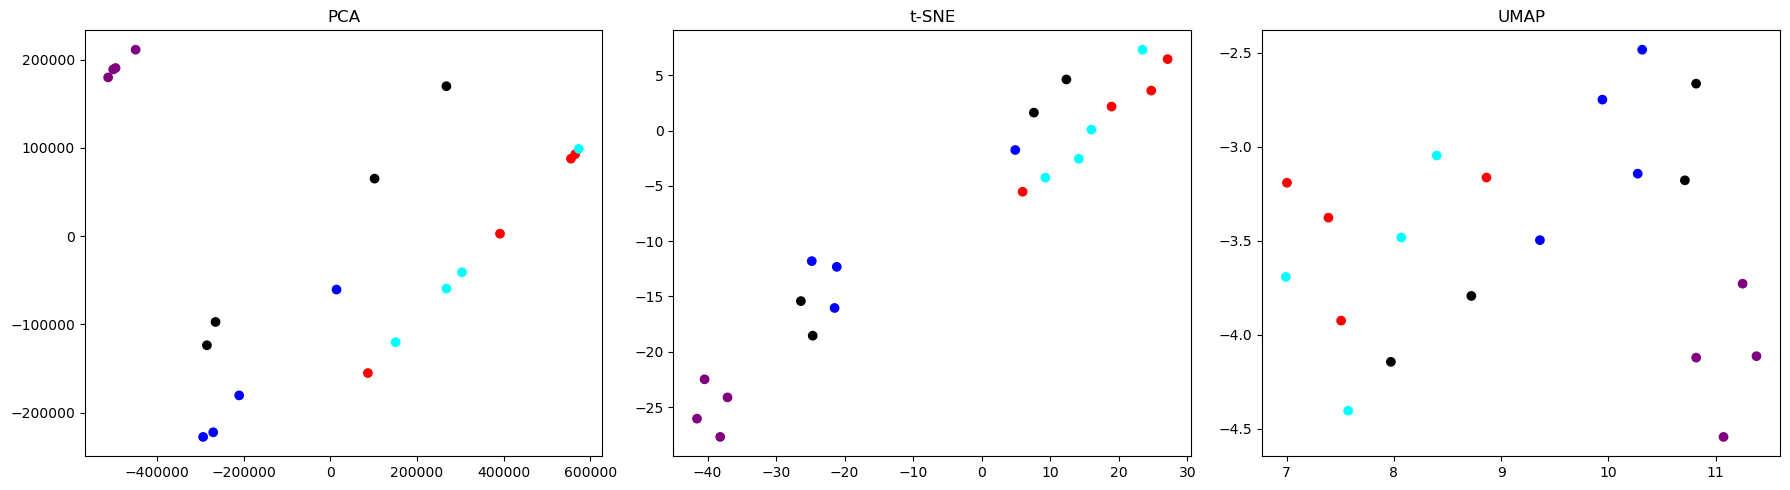

In [59]:
higher_visualization(all_features, cmap = my_cmap)

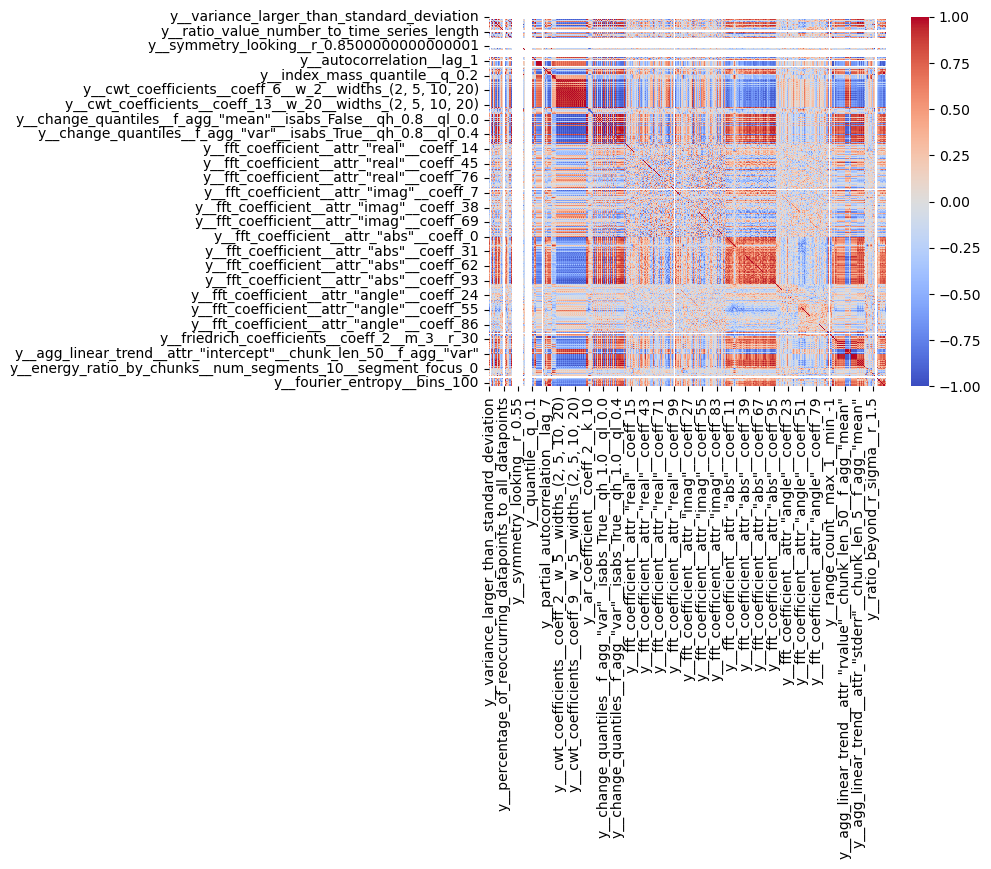

In [71]:
all_features_v1 = all_features.iloc[:, 1:]
corr = all_features_v1.corr()

# Visualize (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

# Feature Reduction

### Variance Filter

In [1]:
import pandas as pd

In [4]:
X_raw = pd.read_csv("/home/think/Desktop/all_df.csv")  # or however you have it

In [5]:
X_raw.head()

,Unnamed: 0,id,x,y,z
0,0,1,0.100000,0.100000,0.100000
1,1,1,0.095657,0.102960,0.107116
2,2,1,0.091243,0.105749,0.114304
3,3,1,0.086763,0.108366,0.121566
4,4,1,0.082225,0.110810,0.128902


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = X_raw.copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0.1

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X_mm[features_highvar]

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [102]:
X_filtered_step_1.head()

,y__variance_larger_than_standard_deviation,y__abs_energy,y__mean_abs_change,y__standard_deviation,y__variance,y__root_mean_square,y__absolute_sum_of_changes,y__longest_strike_below_mean,y__longest_strike_above_mean,y__sample_entropy,...,y__energy_ratio_by_chunks__num_segments_10__segment_focus_0,y__ratio_beyond_r_sigma__r_2,y__ratio_beyond_r_sigma__r_2.5,y__ratio_beyond_r_sigma__r_3,y__lempel_ziv_complexity__bins_3,y__lempel_ziv_complexity__bins_10,y__fourier_entropy__bins_2,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.329504,0.100868,0.560005,0.334133,0.542239,0.100868,0.145520,0.317221,0.000000,...,0.000000,0.552672,0.105442,0.0,0.208333,0.140039,0.0,0.000000,0.0,0.606041
1,1.0,0.358639,0.109642,0.585812,0.363389,0.568841,0.109642,0.122216,0.318731,0.027369,...,0.003889,0.322137,0.000000,0.0,0.243056,0.151874,0.0,0.000000,0.0,0.606225
2,1.0,0.347845,0.110588,0.576378,0.352553,0.559113,0.110588,0.120663,0.318731,0.044054,...,0.010698,0.375573,0.051020,0.0,0.256944,0.167653,0.0,0.000000,0.0,0.604560
3,1.0,0.373062,0.117514,0.598177,0.377840,0.581616,0.117514,0.117038,0.320242,0.050917,...,0.018355,0.267176,0.000000,0.0,0.284722,0.191321,0.0,0.000000,0.0,0.606284
4,1.0,0.994843,1.000000,1.000000,1.000000,0.997220,1.000000,1.000000,0.613293,0.905891,...,0.991103,0.000000,0.000000,0.0,0.923611,0.946746,1.0,0.926492,1.0,1.000000


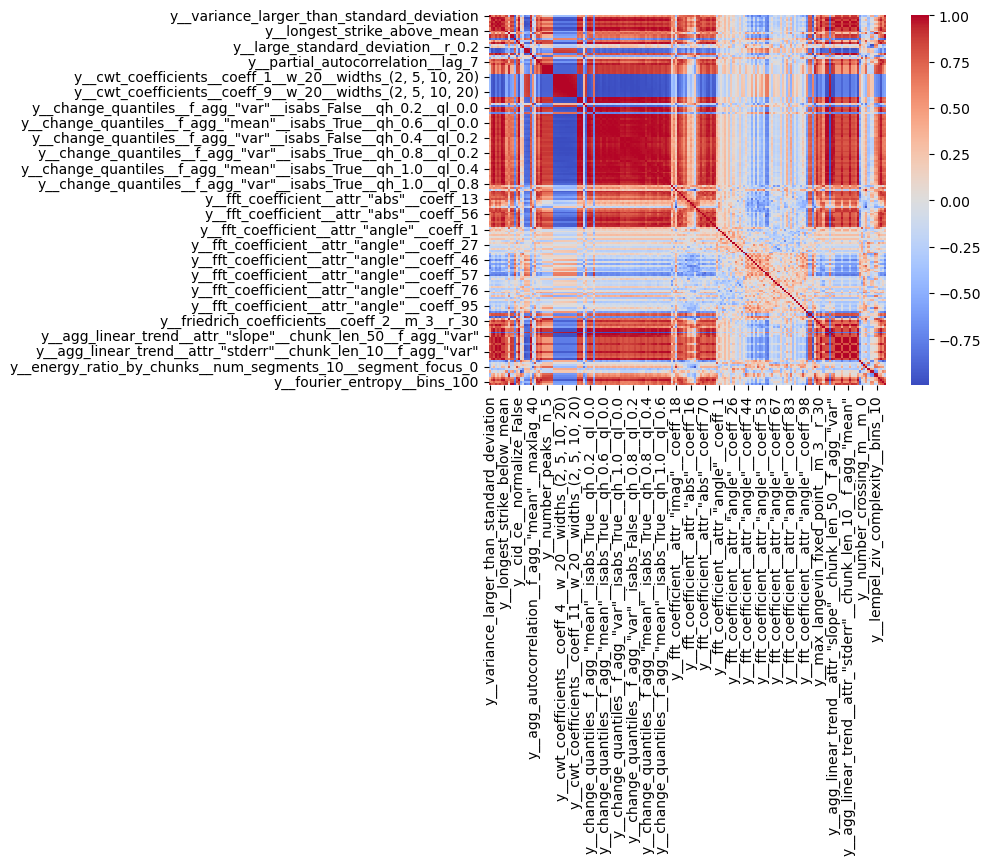

In [103]:
miracle = X_filtered_step_1
corr = miracle.corr()

# Visualize (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [104]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_filtered_step_1['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_32441/386553058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


In [105]:
X_filtered_step_1.head()

,sample_name,y__variance_larger_than_standard_deviation,y__abs_energy,y__mean_abs_change,y__standard_deviation,y__variance,y__root_mean_square,y__absolute_sum_of_changes,y__longest_strike_below_mean,y__longest_strike_above_mean,...,y__energy_ratio_by_chunks__num_segments_10__segment_focus_0,y__ratio_beyond_r_sigma__r_2,y__ratio_beyond_r_sigma__r_2.5,y__ratio_beyond_r_sigma__r_3,y__lempel_ziv_complexity__bins_3,y__lempel_ziv_complexity__bins_10,y__fourier_entropy__bins_2,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__mean_n_absolute_max__number_of_maxima_7
0,rossler,1.0,0.329504,0.100868,0.560005,0.334133,0.542239,0.100868,0.145520,0.317221,...,0.000000,0.552672,0.105442,0.0,0.208333,0.140039,0.0,0.000000,0.0,0.606041
1,rossler,1.0,0.358639,0.109642,0.585812,0.363389,0.568841,0.109642,0.122216,0.318731,...,0.003889,0.322137,0.000000,0.0,0.243056,0.151874,0.0,0.000000,0.0,0.606225
2,rossler,1.0,0.347845,0.110588,0.576378,0.352553,0.559113,0.110588,0.120663,0.318731,...,0.010698,0.375573,0.051020,0.0,0.256944,0.167653,0.0,0.000000,0.0,0.604560
3,rossler,1.0,0.373062,0.117514,0.598177,0.377840,0.581616,0.117514,0.117038,0.320242,...,0.018355,0.267176,0.000000,0.0,0.284722,0.191321,0.0,0.000000,0.0,0.606284
4,lorenz63,1.0,0.994843,1.000000,1.000000,1.000000,0.997220,1.000000,1.000000,0.613293,...,0.991103,0.000000,0.000000,0.0,0.923611,0.946746,1.0,0.926492,1.0,1.000000


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


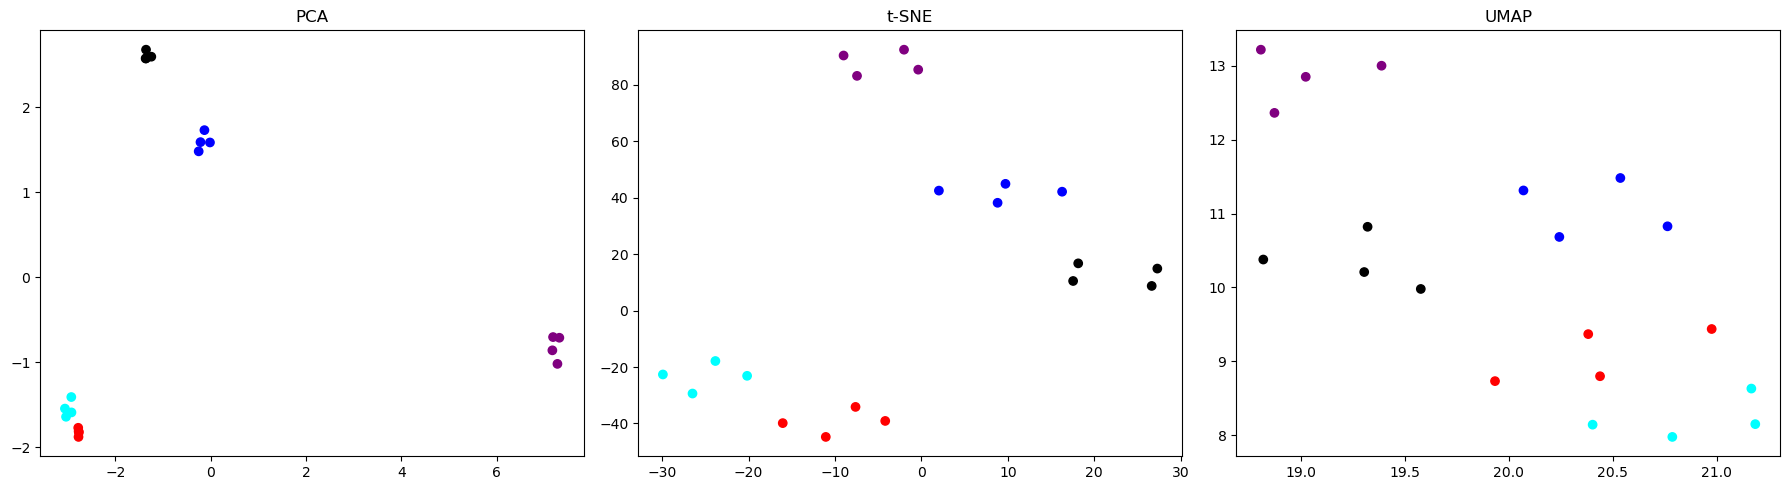

In [106]:
higher_visualization(X_filtered_step_1, cmap = my_cmap)

### Clustering Network Filtering?

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

# 1️⃣ Assume X_raw (20×788) is your tsfresh dataframe
X = X_filtered_step_1.copy()

# 2️⃣ Standardize features
Xz = pd.DataFrame(
    StandardScaler().fit_transform(X),
    index=X.index, columns=X.columns
)

# 3️⃣ Compute Spearman correlation distance matrix
corr = Xz.corr(method="spearman").abs()
dist = 1 - corr

# 4️⃣ Convert to condensed distance for clustering
from scipy.spatial.distance import squareform
dist_condensed = squareform(dist.values, checks=False)

#dist_condensed_clean = dist_condensed[~np.isnan(dist_condensed)]
dist_condensed_filled = np.nan_to_num(dist_condensed, nan = 0.0)

# 5️⃣ Hierarchical clustering (ward or average linkage)
Z = linkage(dist_condensed_filled, method="average")

# 6️⃣ Determine clusters by thresholding distance
# Adjust threshold to yield ~100 clustersq
threshold = 0.5

clusters = fcluster(Z, t=threshold, criterion='distance')

# 7️⃣ Build cluster → feature mapping
cluster_df = pd.DataFrame({
    'feature': X.columns,
    'cluster': clusters
})
n_clusters = cluster_df['cluster'].nunique()
print(f"{n_clusters} clusters found.")

# 8️⃣ Choose representative per cluster (e.g. highest variance)
rep_features = []
for cl in np.unique(clusters):
    members = cluster_df[cluster_df.cluster == cl].feature
    variances = Xz[members].var(axis=0)
    best = variances.idxmax()
    rep_features.append(best)

print(f"{len(rep_features)} representative features selected.")

# 9️⃣ Filtered data
X_rep = X[rep_features]


In [97]:
X_rep.head()

,"y__fft_coefficient__attr_""angle""__coeff_1","y__fft_coefficient__attr_""angle""__coeff_90","y__fft_coefficient__attr_""angle""__coeff_45","y__fft_coefficient__attr_""angle""__coeff_60","y__fft_coefficient__attr_""angle""__coeff_53","y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)","y__fft_coefficient__attr_""angle""__coeff_65","y__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","y__fft_coefficient__attr_""abs""__coeff_75","y__fft_coefficient__attr_""angle""__coeff_48",...,"y__fft_coefficient__attr_""angle""__coeff_88","y__fft_coefficient__attr_""angle""__coeff_85","y__fft_coefficient__attr_""angle""__coeff_36","y__fft_coefficient__attr_""angle""__coeff_73","y__fft_coefficient__attr_""angle""__coeff_12","y__fft_coefficient__attr_""angle""__coeff_4","y__fft_coefficient__attr_""angle""__coeff_31","y__fft_coefficient__attr_""angle""__coeff_27","y__fft_coefficient__attr_""angle""__coeff_30","y__fft_coefficient__attr_""angle""__coeff_8"
0,0.879402,0.242341,0.055813,0.173000,0.000000,0.939860,0.588829,0.488583,0.013108,0.441989,...,0.207459,0.000000,0.797311,0.284769,1.000000,0.820021,0.300437,0.479451,1.000000,0.949834
1,0.934719,0.590160,0.595390,0.803596,0.177980,0.951191,0.450762,0.264777,0.039232,0.327711,...,0.295341,0.113353,0.969879,0.442425,0.822591,0.942437,0.199225,0.182079,0.598513,0.079321
2,0.950701,0.968636,0.250044,0.633037,0.334856,0.962540,0.015818,0.935227,0.033258,0.768126,...,0.625658,0.580859,0.034062,0.819053,0.022572,0.012586,0.573105,0.554618,0.043892,0.840872
3,0.968099,0.000000,0.415438,0.286226,0.371188,0.973910,0.461170,0.919251,0.046200,0.243952,...,0.726497,0.974111,0.086970,1.000000,0.435914,0.000000,0.814726,0.738486,0.498206,0.980728
4,0.899202,0.107240,0.304170,0.883527,0.046070,0.000000,0.501571,0.074023,1.000000,0.279135,...,0.012286,0.215359,0.000000,0.878532,0.684067,0.906877,0.830351,0.026588,0.122219,0.724392


In [ ]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_rep['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_rep.columns if col != 'sample_name']
X_rep = X_rep[cols]

/tmp/ipykernel_32441/3829804289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_rep['sample_name'] = sample_names


In [100]:
X_rep.head()

,sample_name,"y__fft_coefficient__attr_""angle""__coeff_1","y__fft_coefficient__attr_""angle""__coeff_90","y__fft_coefficient__attr_""angle""__coeff_45","y__fft_coefficient__attr_""angle""__coeff_60","y__fft_coefficient__attr_""angle""__coeff_53","y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)","y__fft_coefficient__attr_""angle""__coeff_65","y__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","y__fft_coefficient__attr_""abs""__coeff_75",...,"y__fft_coefficient__attr_""angle""__coeff_88","y__fft_coefficient__attr_""angle""__coeff_85","y__fft_coefficient__attr_""angle""__coeff_36","y__fft_coefficient__attr_""angle""__coeff_73","y__fft_coefficient__attr_""angle""__coeff_12","y__fft_coefficient__attr_""angle""__coeff_4","y__fft_coefficient__attr_""angle""__coeff_31","y__fft_coefficient__attr_""angle""__coeff_27","y__fft_coefficient__attr_""angle""__coeff_30","y__fft_coefficient__attr_""angle""__coeff_8"
0,rossler,0.879402,0.242341,0.055813,0.173000,0.000000,0.939860,0.588829,0.488583,0.013108,...,0.207459,0.000000,0.797311,0.284769,1.000000,0.820021,0.300437,0.479451,1.000000,0.949834
1,rossler,0.934719,0.590160,0.595390,0.803596,0.177980,0.951191,0.450762,0.264777,0.039232,...,0.295341,0.113353,0.969879,0.442425,0.822591,0.942437,0.199225,0.182079,0.598513,0.079321
2,rossler,0.950701,0.968636,0.250044,0.633037,0.334856,0.962540,0.015818,0.935227,0.033258,...,0.625658,0.580859,0.034062,0.819053,0.022572,0.012586,0.573105,0.554618,0.043892,0.840872
3,rossler,0.968099,0.000000,0.415438,0.286226,0.371188,0.973910,0.461170,0.919251,0.046200,...,0.726497,0.974111,0.086970,1.000000,0.435914,0.000000,0.814726,0.738486,0.498206,0.980728
4,lorenz63,0.899202,0.107240,0.304170,0.883527,0.046070,0.000000,0.501571,0.074023,1.000000,...,0.012286,0.215359,0.000000,0.878532,0.684067,0.906877,0.830351,0.026588,0.122219,0.724392


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


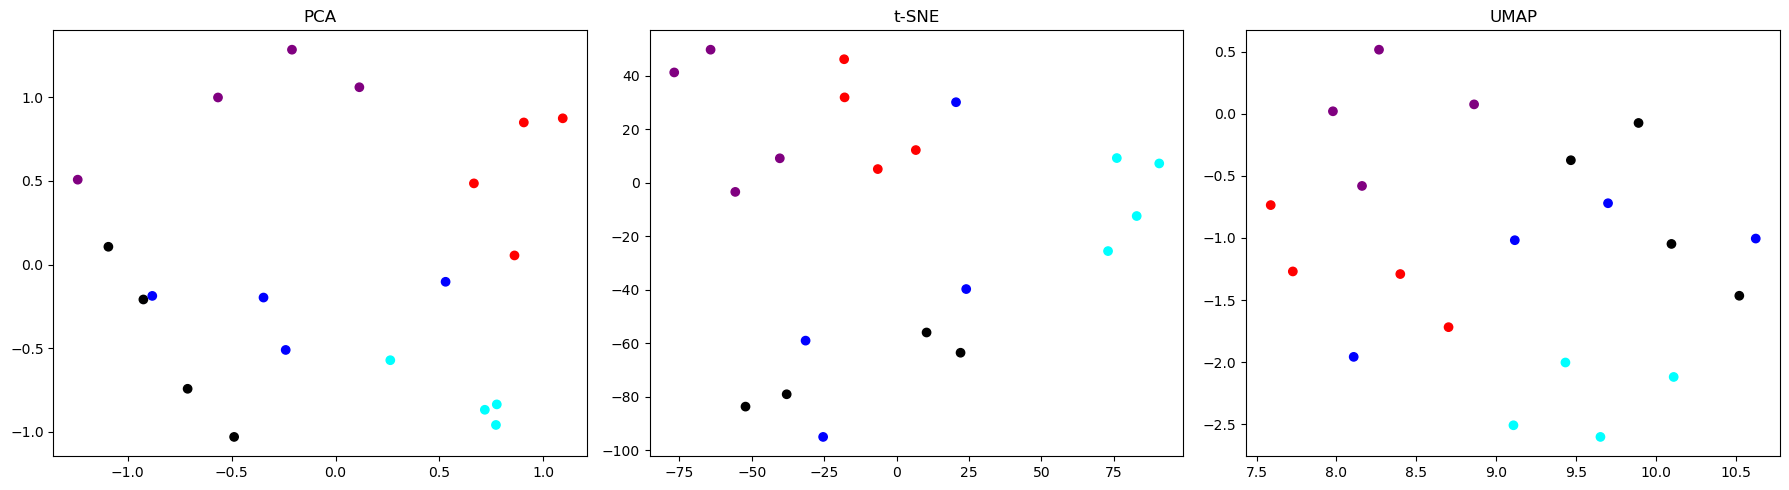

In [101]:
higher_visualization(X_rep, cmap = my_cmap)

# Cluster Filtering

In [2]:
import pandas as pd

In [3]:
df_combined = pd.read_csv("/home/think/Desktop/TESIS/csv_files/df_combined.csv")

In [4]:
df_combined.head()

,system,lyap,corr_dim,ap_entropy,"y__fft_coefficient__attr_""angle""__coeff_1","y__fft_coefficient__attr_""angle""__coeff_90","y__fft_coefficient__attr_""angle""__coeff_45","y__fft_coefficient__attr_""angle""__coeff_60","y__fft_coefficient__attr_""angle""__coeff_53","y__cwt_coefficients__coeff_10__w_20__widths_(2, 5, 10, 20)",...,"y__fft_coefficient__attr_""angle""__coeff_88","y__fft_coefficient__attr_""angle""__coeff_85","y__fft_coefficient__attr_""angle""__coeff_36","y__fft_coefficient__attr_""angle""__coeff_73","y__fft_coefficient__attr_""angle""__coeff_12","y__fft_coefficient__attr_""angle""__coeff_4","y__fft_coefficient__attr_""angle""__coeff_31","y__fft_coefficient__attr_""angle""__coeff_27","y__fft_coefficient__attr_""angle""__coeff_30","y__fft_coefficient__attr_""angle""__coeff_8"
0,rossler,0.000906,1.303454,0.026955,0.879402,0.242341,0.055813,0.173000,0.000000,0.939860,...,0.207459,0.000000,0.797311,0.284769,1.000000,0.820021,0.300437,0.479451,1.000000,0.949834
1,rossler,0.000650,1.421300,0.030519,0.934719,0.590160,0.595390,0.803596,0.177980,0.951191,...,0.295341,0.113353,0.969879,0.442425,0.822591,0.942437,0.199225,0.182079,0.598513,0.079321
2,rossler,0.001003,1.465523,0.032465,0.950701,0.968636,0.250044,0.633037,0.334856,0.962540,...,0.625658,0.580859,0.034062,0.819053,0.022572,0.012586,0.573105,0.554618,0.043892,0.840872
3,rossler,0.000947,1.480771,0.033371,0.968099,0.000000,0.415438,0.286226,0.371188,0.973910,...,0.726497,0.974111,0.086970,1.000000,0.435914,0.000000,0.814726,0.738486,0.498206,0.980728
4,lorenz63,0.008874,1.581581,0.144200,0.899202,0.107240,0.304170,0.883527,0.046070,0.000000,...,0.012286,0.215359,0.000000,0.878532,0.684067,0.906877,0.830351,0.026588,0.122219,0.724392


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


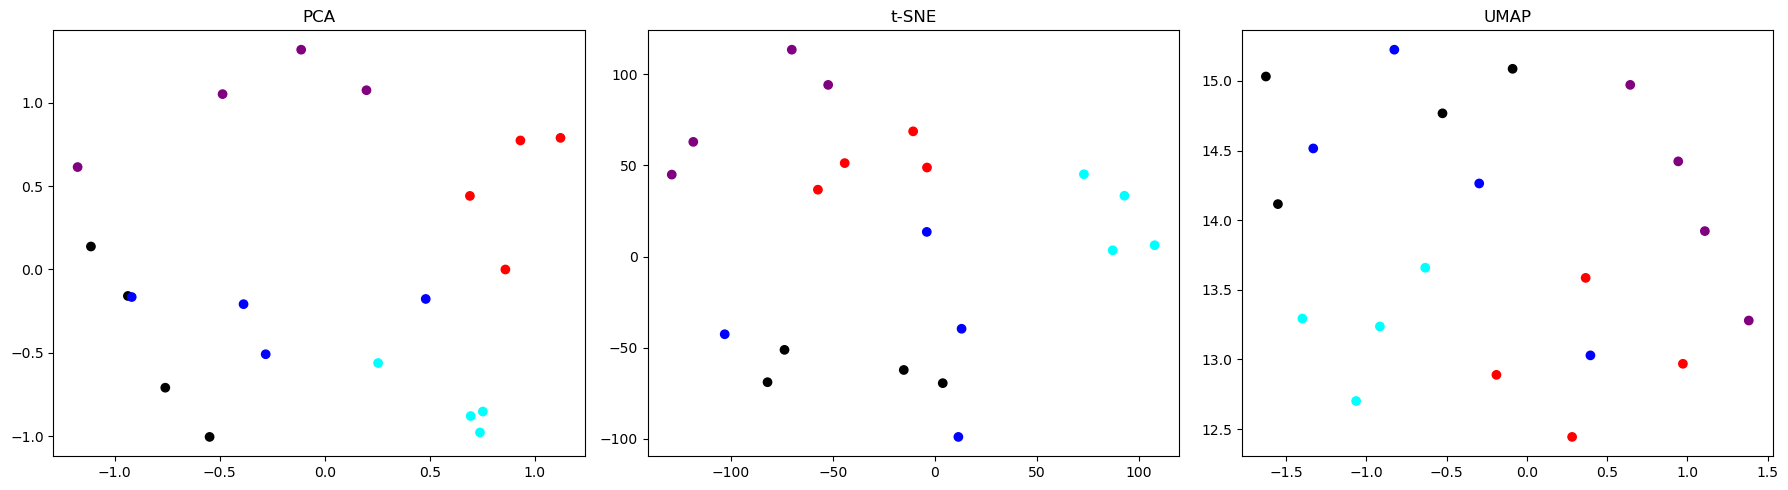

In [17]:
higher_visualization(df_combined, cmap=my_cmap)

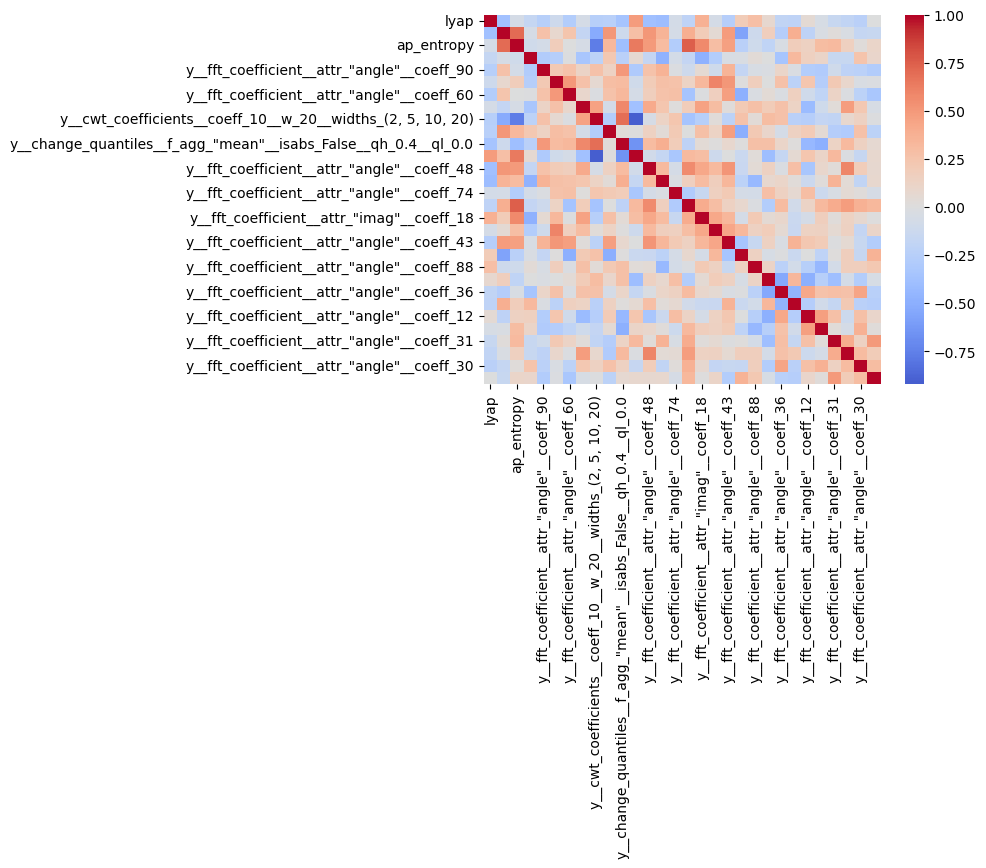

In [72]:
miracle = df_combined.iloc[:, 1:]
corr = miracle.corr()

# Visualize (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

# Chaos Features + All_features + Variance Filtering

In [11]:
import pandas as pd

In [12]:
X_raw = pd.read_csv("/home/think/Desktop/TESIS/csv_files/all_features.csv")  
chaos_features = pd.read_csv("/home/think/Desktop/TESIS/csv_files/chaos_features.csv")

In [13]:
chaos_features = chaos_features.iloc[:, :-1]

In [14]:
All = pd.concat([chaos_features, X_raw], axis=1)

In [15]:
All.head()

,lyap,corr_dim,ap_entropy,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
0,0.000906,1.303454,0.026955,1.0,0.0,0.0,0.0,774.013307,192383.394273,0.038264,...,0.045395,0.125256,0.136002,0.718550,0.744007,0.769456,0.794897,0.820329,NaN,11.424825
1,0.000650,1.421300,0.030519,1.0,0.0,0.0,0.0,483.633601,209091.544304,0.040962,...,0.045395,0.125256,0.136002,0.718719,0.744341,0.769954,0.795560,0.821158,NaN,11.427862
2,0.001003,1.465523,0.032465,1.0,0.0,0.0,0.0,592.282455,202901.126317,0.041253,...,0.045395,0.125256,0.136002,0.718443,0.743963,0.769474,0.794978,0.820473,NaN,11.400400
3,0.000947,1.480771,0.033371,1.0,0.0,0.0,0.0,488.595747,217362.813739,0.043383,...,0.045395,0.125256,0.136002,0.718570,0.744191,0.769804,0.795409,0.821006,NaN,11.428826
4,0.008874,1.581581,0.144200,1.0,0.0,0.0,0.0,2266.440732,573943.871589,0.314801,...,0.170467,0.260704,0.406332,0.812217,0.931429,1.052162,1.173759,1.297051,NaN,17.920598


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = All.copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0.1

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X_mm[features_highvar]

Features kept: 195 (threshold=0.1)


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [7]:
sample_names = [
    'rossler', 'rossler', 'rossler', 'rossler',
    'lorenz63', 'lorenz63', 'lorenz63', 'lorenz63',
    'aizawa', 'aizawa', 'aizawa', 'aizawa',
    'dadras', 'dadras', 'dadras', 'dadras',
    'sprott', 'sprott', 'sprott', 'sprott'
]

# Add as a new column
X_filtered_step_1['sample_name'] = sample_names

# Reorder columns to put 'sample_name' first
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_38050/386553058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


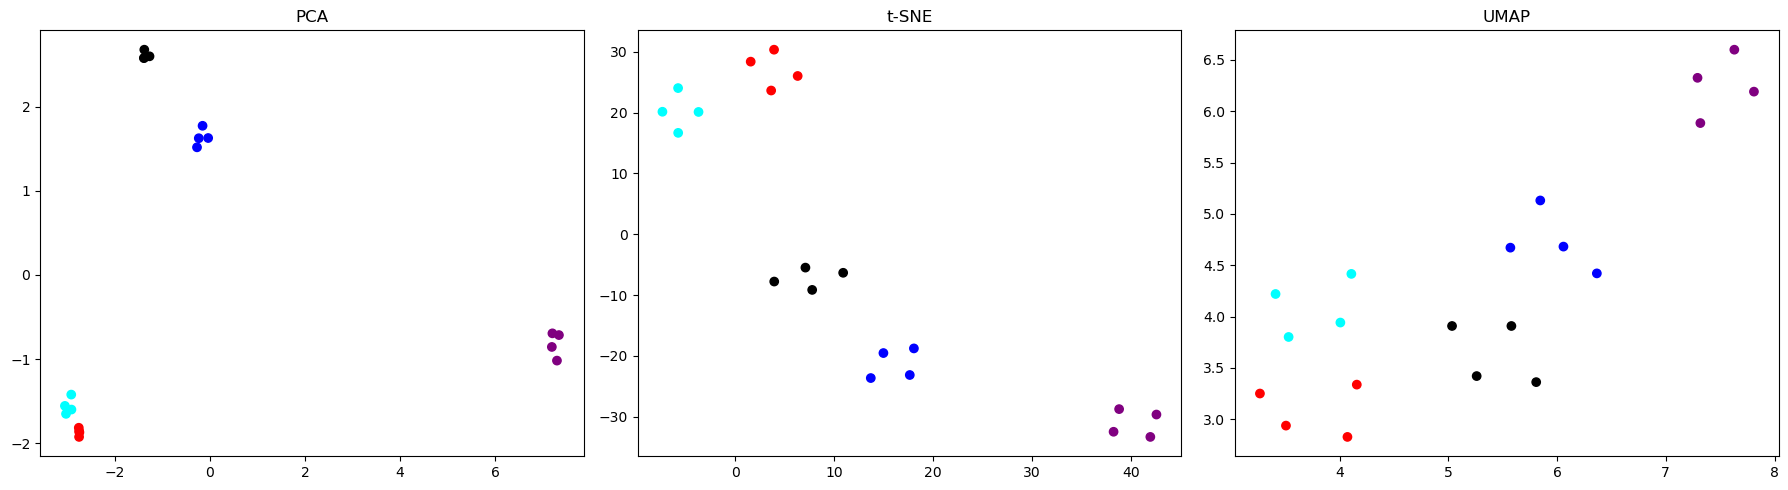

In [10]:
higher_visualization(X_filtered_step_1, cmap = my_cmap)